# PyMC3 Custom Callbacks

A notebook for experimenting with custom callbacks in PyMC3.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pymc3 as pm
import seaborn as sns

In [3]:
from speclet.modeling.custom_pymc3_callbacks import ProgressPrinterCallback

In [15]:
np.random.seed(123)

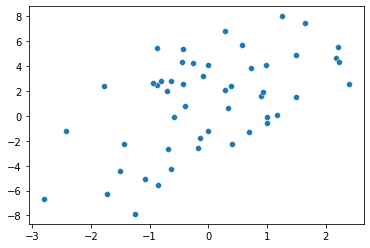

In [16]:
N = 50
b, m, eps = 1, 2, 3
x = np.random.normal(0, 1, N)
y = np.random.normal(b + m * x, eps)

sns.scatterplot(x=x, y=y);

In [26]:
progress_cb = ProgressPrinterCallback(every_n=100)

In [28]:
X = np.hstack([np.ones((N, 3)), x.reshape(-1, 1)])

with pm.Model() as model:
    beta = pm.Normal("beta", 0, 100, shape=(4, 1))
    mu = pm.Deterministic("mu", pm.math.dot(X, beta))
    sigma = pm.HalfNormal("sigma", 100)
    y_pred = pm.Normal("y", mu, sigma, observed=y)

    trace = pm.sample(
        draws=500,
        tune=5,
        chains=2,
        cores=2,
        random_seed=33,
        return_inferencedata=True,
        callback=progress_cb,
        progressbar=False,
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta]


2022-01-28 12:09:12.943875, chain=0, draw=0, tune, divergences=499
2022-01-28 12:09:19.515563, chain=1, draw=0, tune, divergences=1
2022-01-28 12:09:22.124158, chain=0, draw=100, sampling, divergences=499
2022-01-28 12:09:27.625699, chain=1, draw=100, sampling, divergences=1
2022-01-28 12:09:31.777240, chain=0, draw=200, sampling, divergences=499


Sampling 2 chains for 5 tune and 193 draw iterations (10 + 386 draws total) took 40 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


In [8]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

---

In [9]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-01-28

Python implementation: CPython
Python version       : 3.9.9
IPython version      : 8.0.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac

Git branch: nb-model

seaborn: 0.11.2
pymc3  : 3.11.4
numpy  : 1.22.0

